In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
countries_files=["BGD-646 PPG Bilateral Debt.xlsx","BTN-646 PPG Bilateral Debt.xlsx","LKA-646 PPG Bilateral Debt.xlsx","MDV-646 PPG Bilateral Debt.xlsx","MMR-646 PPG Bilateral Debt.xlsx","NPL-646 PPG Bilateral Debt.xlsx"]

df1=[]
for file in countries_files:
    df=pd.read_excel(file)
    df1.append(df)

data=pd.concat(df1,ignore_index=True)

In [3]:
data.head()

,Unnamed: 0,year,creditor,debtor,indicator,data
0,2,1972,646,BGD,DT.DOD.BLAT.CD,"21,854,838.40"
1,3,1973,646,BGD,DT.DOD.BLAT.CD,"33,858,828.00"
2,4,1974,646,BGD,DT.DOD.BLAT.CD,"61,027,156.20"
3,5,1975,646,BGD,DT.DOD.BLAT.CD,"77,443,142.10"
4,6,1976,646,BGD,DT.DOD.BLAT.CD,"97,068,859.80"


In [4]:
data=data.drop(columns=["Unnamed: 0","indicator"],axis="columns")

In [5]:
data

,year,creditor,debtor,data
0,1972,646,BGD,"21,854,838.40"
1,1973,646,BGD,"33,858,828.00"
2,1974,646,BGD,"61,027,156.20"
3,1975,646,BGD,"77,443,142.10"
4,1976,646,BGD,"97,068,859.80"
...,...,...,...,...
339,2024,646,NPL,NaN
340,2025,646,NPL,NaN
341,2026,646,NPL,NaN
342,2027,646,NPL,NaN


In [6]:
data.shape

(344, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      344 non-null    int64  
 1   creditor  344 non-null    int64  
 2   debtor    344 non-null    object 
 3   data      205 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 10.9+ KB


In [8]:
data=data.rename(columns={"year":"Debt_Year","creditor":"Creditor","debtor":"Debtor","data":"Debt_amt"})

In [9]:
data.head()

,Debt_Year,Creditor,Debtor,Debt_amt
0,1972,646,BGD,"21,854,838.40"
1,1973,646,BGD,"33,858,828.00"
2,1974,646,BGD,"61,027,156.20"
3,1975,646,BGD,"77,443,142.10"
4,1976,646,BGD,"97,068,859.80"


In [10]:
data['Creditor'].unique()

array([646], dtype=int64)

In [11]:
data['Creditor']=data['Creditor'].astype(str)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Debt_Year  344 non-null    int64  
 1   Creditor   344 non-null    object 
 2   Debtor     344 non-null    object 
 3   Debt_amt   205 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.9+ KB


In [13]:
data['Creditor']="India"

In [14]:
data['Creditor'].unique()

array(['India'], dtype=object)

In [15]:
data['Debtor'].unique()

array(['BGD', 'BTN', 'LKA', 'MDV', 'MMR', 'NPL'], dtype=object)

In [16]:
data['Debtor']=data['Debtor'].replace({"BGD":"Bangaladesh","BTN":"Bhutan","LKA":"Sri_Lanka","MDV":"Maldives","MMR":"Myanmar","NPL":"Nepal"})

In [17]:
data['Debtor'].unique()

array(['Bangaladesh', 'Bhutan', 'Sri_Lanka', 'Maldives', 'Myanmar',
       'Nepal'], dtype=object)

In [18]:
data.head()

,Debt_Year,Creditor,Debtor,Debt_amt
0,1972,India,Bangaladesh,"21,854,838.40"
1,1973,India,Bangaladesh,"33,858,828.00"
2,1974,India,Bangaladesh,"61,027,156.20"
3,1975,India,Bangaladesh,"77,443,142.10"
4,1976,India,Bangaladesh,"97,068,859.80"


In [19]:
data.isnull().sum()

Debt_Year      0
Creditor       0
Debtor         0
Debt_amt     139
dtype: int64

In [20]:
data=data.fillna(0)

In [21]:
data.isnull().sum()

Debt_Year    0
Creditor     0
Debtor       0
Debt_amt     0
dtype: int64

In [22]:
data.duplicated().any()

False

In [23]:
data=data.loc[data['Debt_Year']<2021,:]

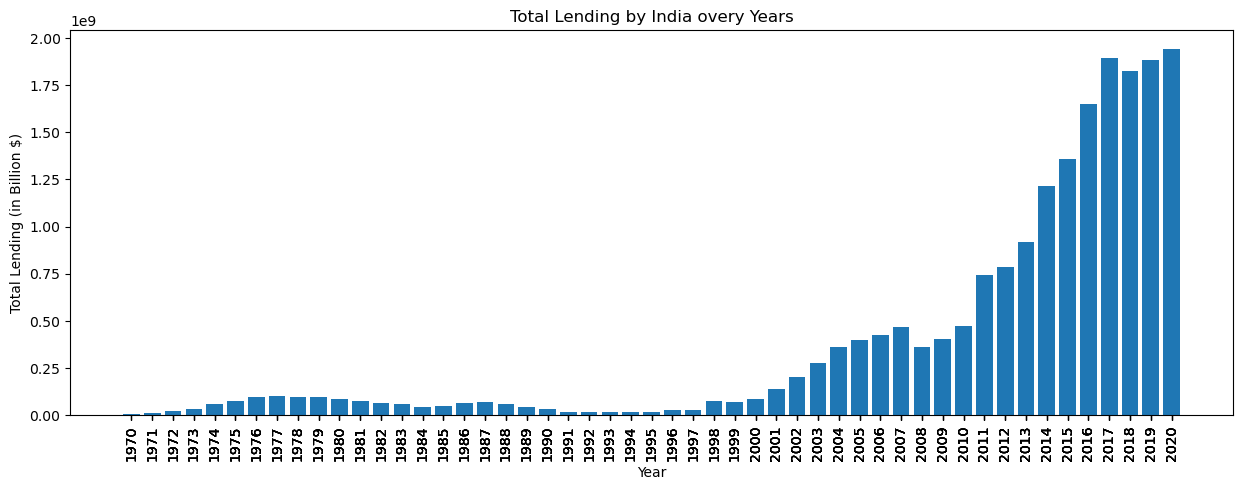

In [24]:
plt.figure(figsize=(15,5))
plt.bar(data['Debt_Year'],data['Debt_amt'])
plt.xlabel("Year")
plt.ylabel("Total Lending (in Billion $)")
plt.xticks(data['Debt_Year'],rotation="vertical")
plt.title("Total Lending by India overy Years")
plt.show()

In [25]:
Country_wise_data=pd.DataFrame(data.groupby("Debtor")['Debt_amt'].sum()).reset_index()
Country_wise_data

,Debtor,Debt_amt
0,Bangaladesh,"6,012,385,635.30"
1,Bhutan,"17,849,159,963.70"
2,Maldives,"1,708,941,195.00"
3,Myanmar,"2,780,001,590.50"
4,Nepal,"873,957,263.80"
5,Sri_Lanka,"9,993,325,488.80"


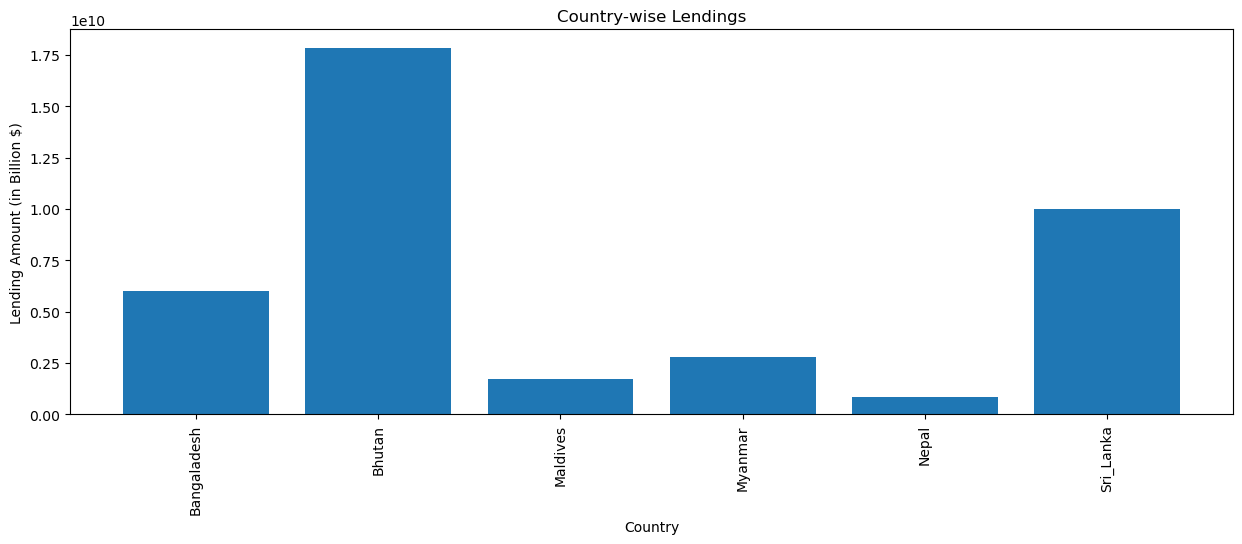

In [26]:
plt.figure(figsize=(15,5))
plt.bar(Country_wise_data['Debtor'],Country_wise_data['Debt_amt'])
plt.title("Country-wise Lendings")
plt.xlabel("Country")
plt.xticks(rotation="vertical")
plt.ylabel("Lending Amount (in Billion $)")
plt.show()

In [27]:
for country in data['Debtor'].unique():
    globals()[f"{country}_data"]=data.loc[data['Debtor']==country]

In [28]:
Bangaladesh_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt
0,1972,India,Bangaladesh,"21,854,838.40"
1,1973,India,Bangaladesh,"33,858,828.00"
2,1974,India,Bangaladesh,"61,027,156.20"
3,1975,India,Bangaladesh,"77,443,142.10"
4,1976,India,Bangaladesh,"97,068,859.80"


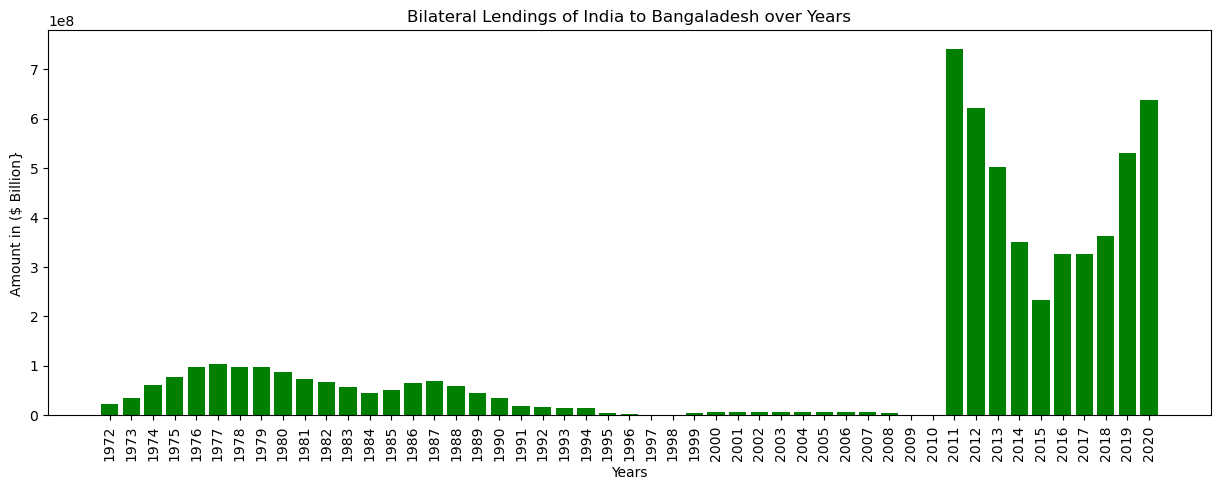

In [29]:
plt.figure(figsize=(15,5))
plt.bar(Bangaladesh_data['Debt_Year'],Bangaladesh_data['Debt_amt'],color="green")
plt.title("Bilateral Lendings of India to Bangaladesh over Years")
plt.xlabel("Years")
plt.ylabel("Amount in ($ Billion}")
plt.xticks(Bangaladesh_data['Debt_Year'],rotation="vertical")
plt.show()

In [30]:
Bangaladesh_data["YoY Growth (in %)"]=round(Bangaladesh_data["Debt_amt"].pct_change()*100,2)

C:\Users\Vaibhav Budholiya\AppData\Local\Temp\ipykernel_15256\231565031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bangaladesh_data["YoY Growth (in %)"]=round(Bangaladesh_data["Debt_amt"].pct_change()*100,2)


In [31]:
Bangaladesh_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt,YoY Growth (in %)
0,1972,India,Bangaladesh,"21,854,838.40",NaN
1,1973,India,Bangaladesh,"33,858,828.00",54.93
2,1974,India,Bangaladesh,"61,027,156.20",80.24
3,1975,India,Bangaladesh,"77,443,142.10",26.90
4,1976,India,Bangaladesh,"97,068,859.80",25.34


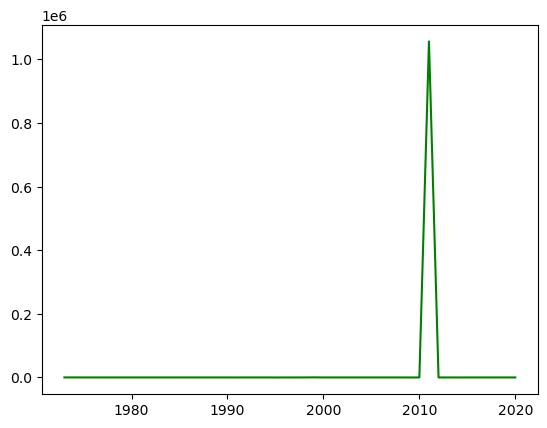

In [32]:
plt.plot(Bangaladesh_data["Debt_Year"],Bangaladesh_data["YoY Growth (in %)"],color="green")

In [33]:
Bangaladesh_data['YoY Growth (in %)'].max()

1055879.99

In [34]:
Bangaladesh_data=Bangaladesh_data.loc[Bangaladesh_data['YoY Growth (in %)']<Bangaladesh_data['YoY Growth (in %)'].max()]

In [35]:
Bangaladesh_data['YoY Growth (in %)'].max()

251.85

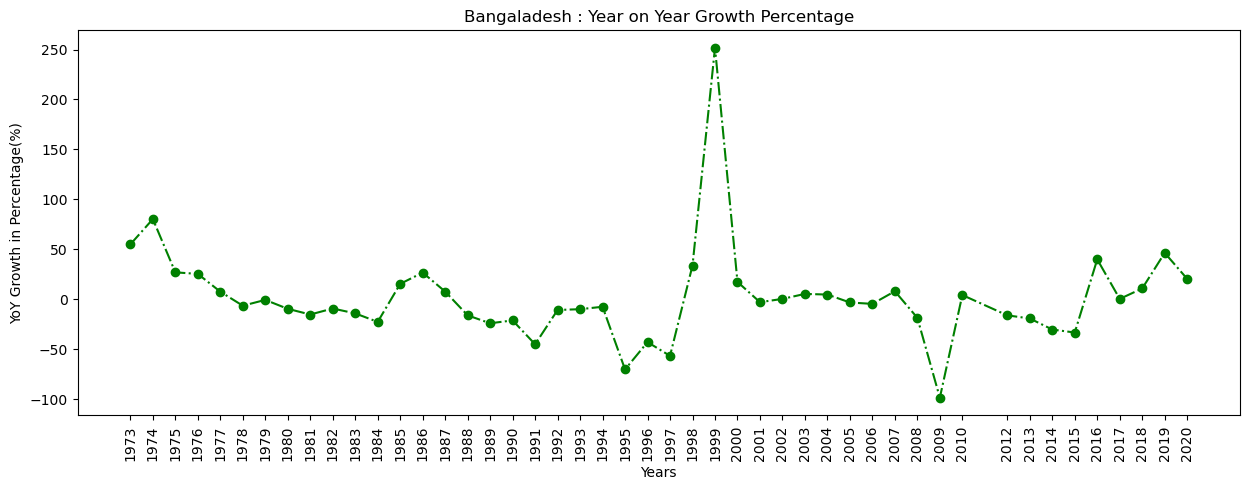

In [36]:
plt.figure(figsize=(15,5))
plt.plot(Bangaladesh_data['Debt_Year'],Bangaladesh_data['YoY Growth (in %)'],marker="o",color="green",linestyle="dashdot")
plt.xlabel("Years")
plt.ylabel("YoY Growth in Percentage(%)")
plt.xticks(Bangaladesh_data['Debt_Year'],rotation="vertical")
plt.title("Bangaladesh : Year on Year Growth Percentage")
plt.show()

In [37]:
Bhutan_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt
49,1970,India,Bhutan,0.00
50,1971,India,Bhutan,0.00
51,1972,India,Bhutan,0.00
52,1973,India,Bhutan,0.00
53,1974,India,Bhutan,0.00


In [38]:
Bhutan_data['YoY Growth %']=round(Bhutan_data['Debt_amt'].pct_change()*100,2)

C:\Users\Vaibhav Budholiya\AppData\Local\Temp\ipykernel_15256\2641075659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bhutan_data['YoY Growth %']=round(Bhutan_data['Debt_amt'].pct_change()*100,2)


In [39]:
Bhutan_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt,YoY Growth %
49,1970,India,Bhutan,0.00,NaN
50,1971,India,Bhutan,0.00,NaN
51,1972,India,Bhutan,0.00,NaN
52,1973,India,Bhutan,0.00,NaN
53,1974,India,Bhutan,0.00,NaN


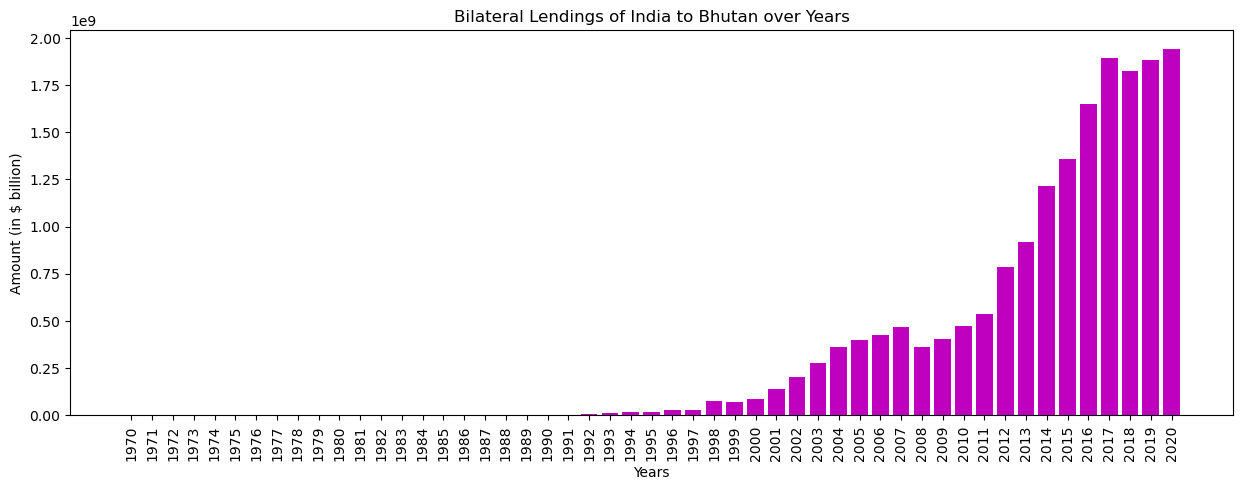

In [40]:
plt.figure(figsize=(15,5))
plt.bar(Bhutan_data['Debt_Year'],Bhutan_data['Debt_amt'],color="m")
plt.xlabel("Years")
plt.ylabel("Amount (in $ billion)")
plt.xticks(Bhutan_data['Debt_Year'],rotation="vertical")
plt.title("Bilateral Lendings of India to Bhutan over Years")
plt.show()

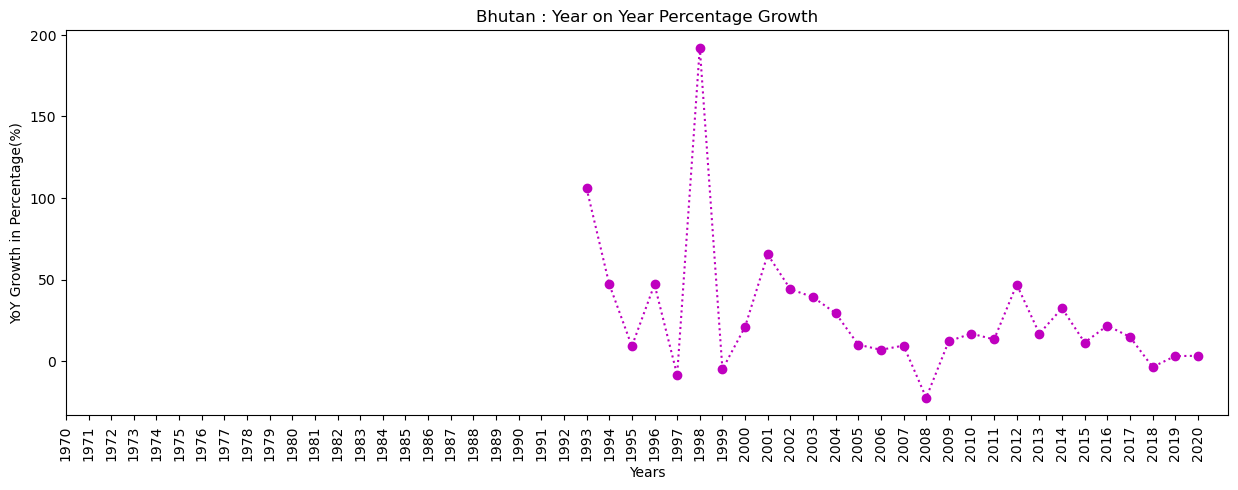

In [41]:
plt.figure(figsize=(15,5))
plt.plot(Bhutan_data['Debt_Year'],Bhutan_data['YoY Growth %'],marker="o",linestyle="dotted",color="m")
plt.xlabel("Years")
plt.ylabel("YoY Growth in Percentage(%)")
plt.xticks(Bhutan_data['Debt_Year'],rotation="vertical")
plt.title("Bhutan : Year on Year Percentage Growth")
plt.show()

In [42]:
Nepal_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt
285,1970,India,Nepal,"461,065.50"
286,1971,India,Nepal,"440,792.50"
287,1972,India,Nepal,"361,757.10"
288,1973,India,Nepal,"321,768.00"
289,1974,India,Nepal,"462,764.40"


In [43]:
Nepal_data['YoY Growth %']=round(Nepal_data['Debt_amt'].pct_change()*100,2)

C:\Users\Vaibhav Budholiya\AppData\Local\Temp\ipykernel_15256\3535237090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nepal_data['YoY Growth %']=round(Nepal_data['Debt_amt'].pct_change()*100,2)


In [44]:
Nepal_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt,YoY Growth %
285,1970,India,Nepal,"461,065.50",NaN
286,1971,India,Nepal,"440,792.50",-4.40
287,1972,India,Nepal,"361,757.10",-17.93
288,1973,India,Nepal,"321,768.00",-11.05
289,1974,India,Nepal,"462,764.40",43.82


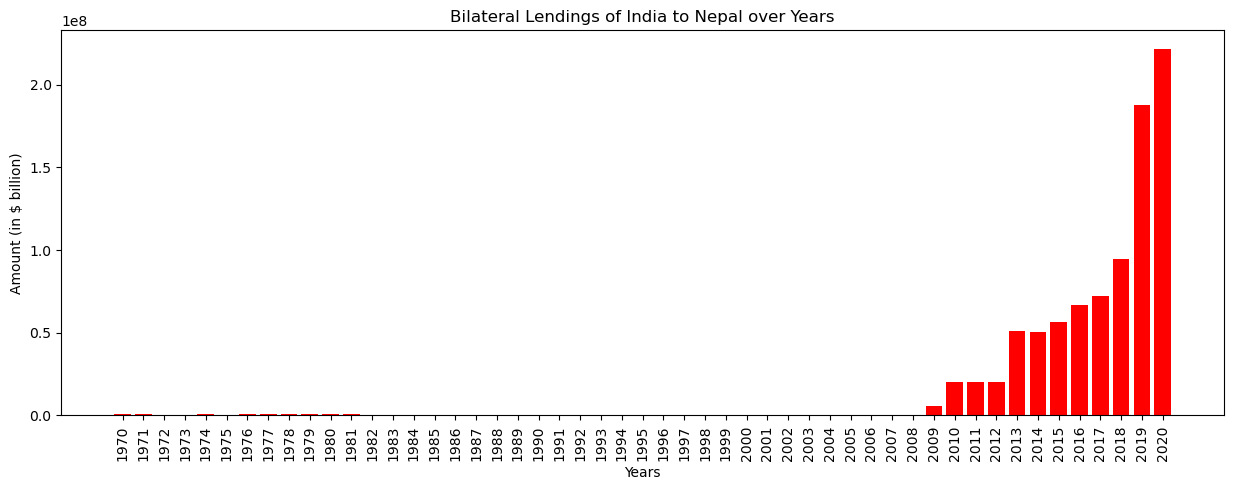

In [45]:
plt.figure(figsize=(15,5))
plt.bar(Nepal_data['Debt_Year'],Nepal_data['Debt_amt'],color="red")
plt.xlabel("Years")
plt.ylabel("Amount (in $ billion)")
plt.xticks(Nepal_data['Debt_Year'],rotation="vertical")
plt.title("Bilateral Lendings of India to Nepal over Years")
plt.show()

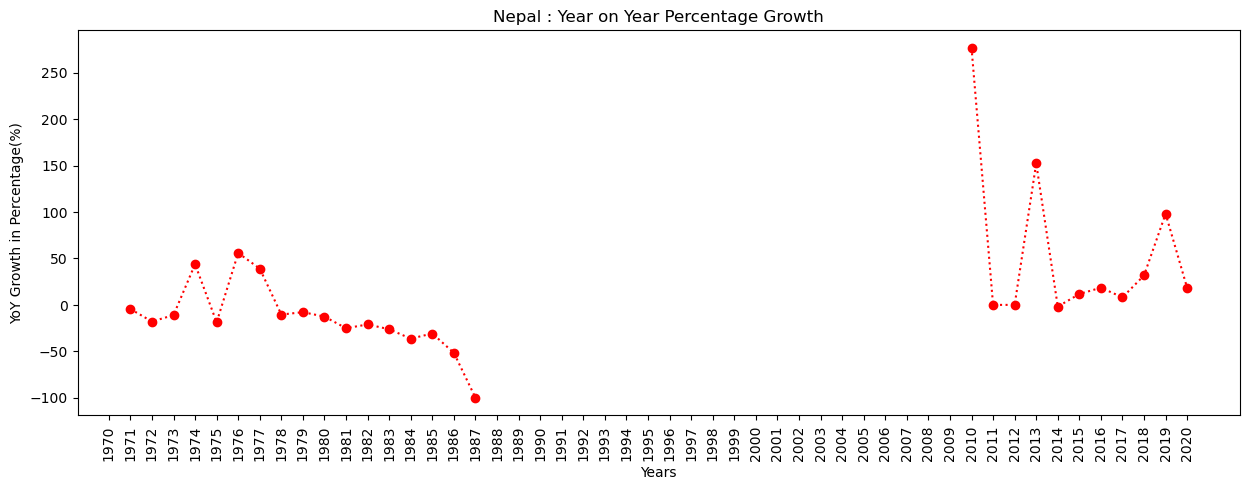

In [46]:
plt.figure(figsize=(15,5))
plt.plot(Nepal_data['Debt_Year'],Nepal_data['YoY Growth %'],marker="o",linestyle="dotted",color="red")
plt.xlabel("Years")
plt.ylabel("YoY Growth in Percentage(%)")
plt.xticks(Nepal_data['Debt_Year'],rotation="vertical")
plt.title("Nepal : Year on Year Percentage Growth")
plt.show()

In [47]:
Myanmar_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt
226,1970,India,Myanmar,"3,333,858.30"
227,1971,India,Myanmar,"1,155,347.70"
228,1972,India,Myanmar,0.00
229,1973,India,Myanmar,0.00
230,1974,India,Myanmar,"1,312,280.00"


In [48]:
Myanmar_data['YoY Growth %']=round(Myanmar_data['Debt_amt'].pct_change()*100,2)

C:\Users\Vaibhav Budholiya\AppData\Local\Temp\ipykernel_15256\2092590653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Myanmar_data['YoY Growth %']=round(Myanmar_data['Debt_amt'].pct_change()*100,2)


In [49]:
Nepal_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt,YoY Growth %
285,1970,India,Nepal,"461,065.50",NaN
286,1971,India,Nepal,"440,792.50",-4.40
287,1972,India,Nepal,"361,757.10",-17.93
288,1973,India,Nepal,"321,768.00",-11.05
289,1974,India,Nepal,"462,764.40",43.82


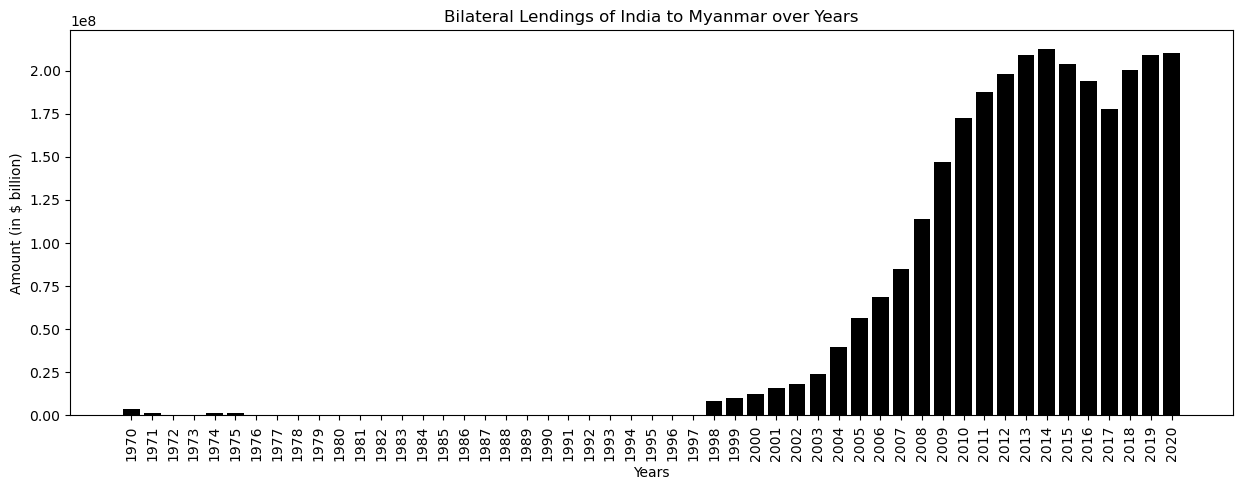

In [50]:
plt.figure(figsize=(15,5))
plt.bar(Myanmar_data['Debt_Year'],Myanmar_data['Debt_amt'],color="black")
plt.xlabel("Years")
plt.ylabel("Amount (in $ billion)")
plt.xticks(Myanmar_data['Debt_Year'],rotation="vertical")
plt.title("Bilateral Lendings of India to Myanmar over Years")
plt.show()

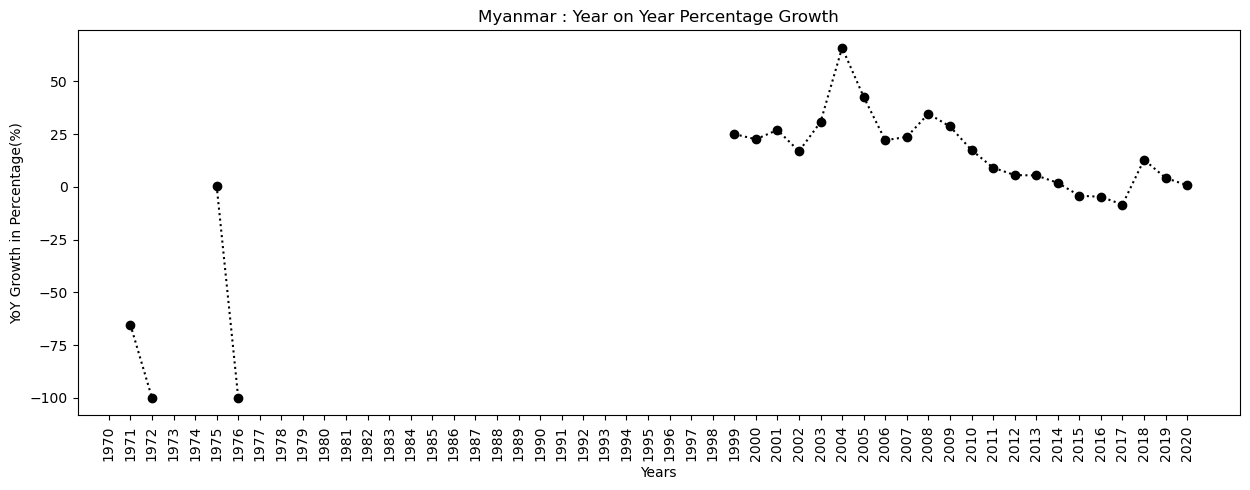

In [51]:
plt.figure(figsize=(15,5))
plt.plot(Myanmar_data['Debt_Year'],Myanmar_data['YoY Growth %'],marker="o",linestyle="dotted",color="black")
plt.xlabel("Years")
plt.ylabel("YoY Growth in Percentage(%)")
plt.xticks(Myanmar_data['Debt_Year'],rotation="vertical")
plt.title("Myanmar : Year on Year Percentage Growth")
plt.show()

In [52]:
Sri_Lanka_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt
108,1970,India,Sri_Lanka,"8,867,177.80"
109,1971,India,Sri_Lanka,"10,428,208.50"
110,1972,India,Sri_Lanka,"10,415,157.40"
111,1973,India,Sri_Lanka,"11,288,202.00"
112,1974,India,Sri_Lanka,"12,413,054.60"


In [53]:
Sri_Lanka_data['YoY Growth %']=round(Sri_Lanka_data['Debt_amt'].pct_change()*100,2)

C:\Users\Vaibhav Budholiya\AppData\Local\Temp\ipykernel_15256\2238977711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sri_Lanka_data['YoY Growth %']=round(Sri_Lanka_data['Debt_amt'].pct_change()*100,2)


In [54]:
Sri_Lanka_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt,YoY Growth %
108,1970,India,Sri_Lanka,"8,867,177.80",NaN
109,1971,India,Sri_Lanka,"10,428,208.50",17.60
110,1972,India,Sri_Lanka,"10,415,157.40",-0.13
111,1973,India,Sri_Lanka,"11,288,202.00",8.38
112,1974,India,Sri_Lanka,"12,413,054.60",9.96


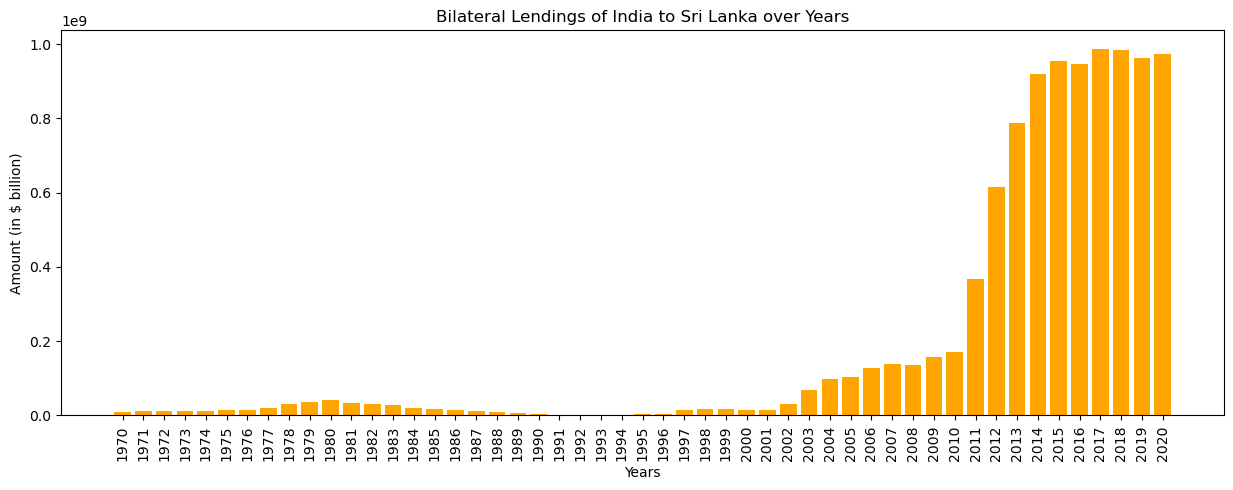

In [55]:
plt.figure(figsize=(15,5))
plt.bar(Sri_Lanka_data['Debt_Year'],Sri_Lanka_data['Debt_amt'],color="orange")
plt.xlabel("Years")
plt.ylabel("Amount (in $ billion)")
plt.xticks(Sri_Lanka_data['Debt_Year'],rotation="vertical")
plt.title("Bilateral Lendings of India to Sri Lanka over Years")
plt.show()

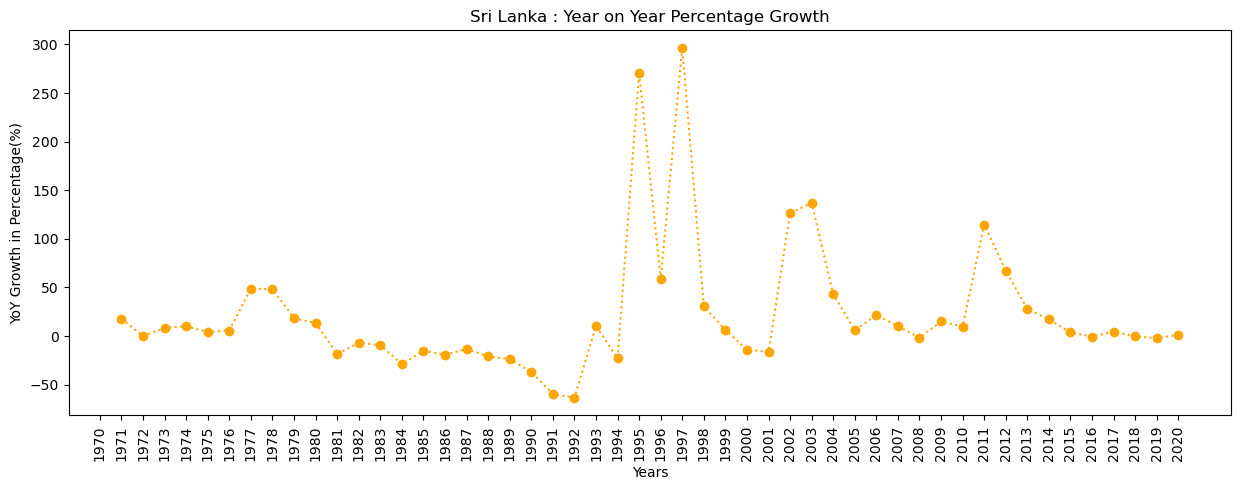

In [56]:
plt.figure(figsize=(15,5))
plt.plot(Sri_Lanka_data['Debt_Year'],Sri_Lanka_data['YoY Growth %'],marker="o",linestyle="dotted",color="orange")
plt.xlabel("Years")
plt.ylabel("YoY Growth in Percentage(%)")
plt.xticks(Sri_Lanka_data['Debt_Year'],rotation="vertical")
plt.title("Sri Lanka : Year on Year Percentage Growth")
plt.show()

In [57]:
Maldives_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt
167,1970,India,Maldives,0.00
168,1971,India,Maldives,0.00
169,1972,India,Maldives,0.00
170,1973,India,Maldives,0.00
171,1974,India,Maldives,0.00


In [58]:
Maldives_data['YoY Growth %']=round(Maldives_data['Debt_amt'].pct_change()*100,2)

C:\Users\Vaibhav Budholiya\AppData\Local\Temp\ipykernel_15256\1430404430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Maldives_data['YoY Growth %']=round(Maldives_data['Debt_amt'].pct_change()*100,2)


In [59]:
Maldives_data.head()

,Debt_Year,Creditor,Debtor,Debt_amt,YoY Growth %
167,1970,India,Maldives,0.00,NaN
168,1971,India,Maldives,0.00,NaN
169,1972,India,Maldives,0.00,NaN
170,1973,India,Maldives,0.00,NaN
171,1974,India,Maldives,0.00,NaN


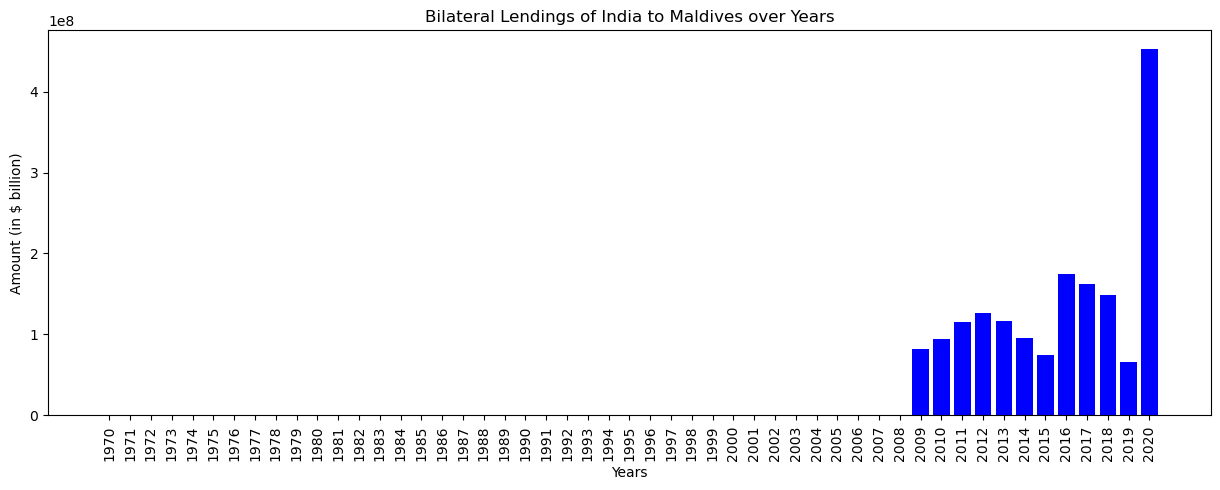

In [60]:
plt.figure(figsize=(15,5))
plt.bar(Maldives_data['Debt_Year'],Maldives_data['Debt_amt'],color="blue")
plt.xlabel("Years")
plt.ylabel("Amount (in $ billion)")
plt.xticks(Maldives_data['Debt_Year'],rotation="vertical")
plt.title("Bilateral Lendings of India to Maldives over Years")
plt.show()

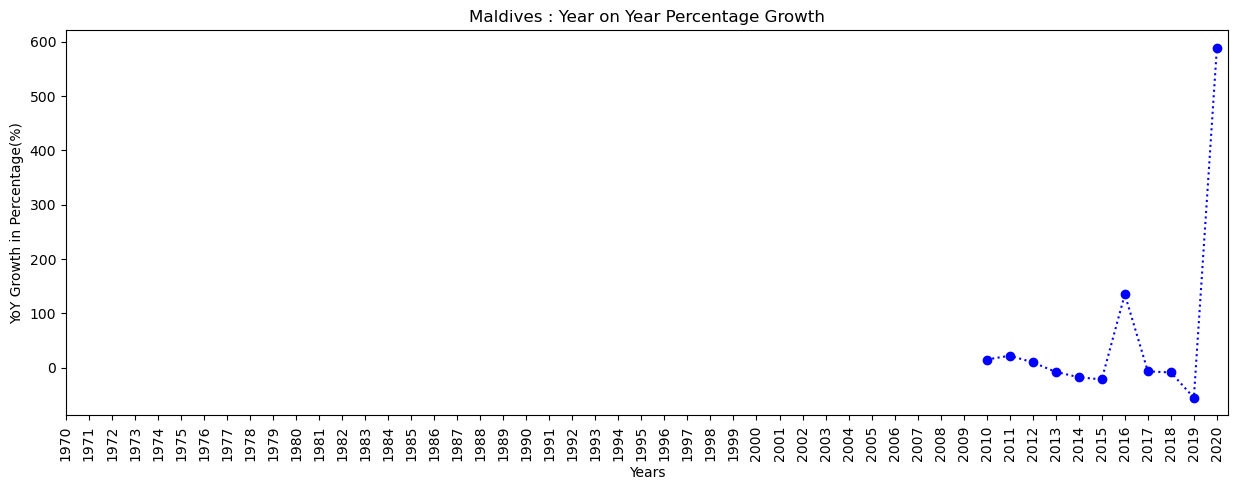

In [61]:
plt.figure(figsize=(15,5))
plt.plot(Maldives_data['Debt_Year'],Maldives_data['YoY Growth %'],marker="o",linestyle="dotted",color="blue")
plt.xlabel("Years")
plt.ylabel("YoY Growth in Percentage(%)")
plt.xticks(Maldives_data['Debt_Year'],rotation="vertical")
plt.title("Maldives : Year on Year Percentage Growth")
plt.show()

In [62]:
Total_lendings=data['Debt_amt'].sum()
print("$",Total_lendings)

$ 39217771137.1


In [63]:
Country_wise_data['Debt_amt_percent']=(Country_wise_data['Debt_amt']/Total_lendings)*100

In [64]:
Country_wise_data

,Debtor,Debt_amt,Debt_amt_percent
0,Bangaladesh,"6,012,385,635.30",15.33
1,Bhutan,"17,849,159,963.70",45.51
2,Maldives,"1,708,941,195.00",4.36
3,Myanmar,"2,780,001,590.50",7.09
4,Nepal,"873,957,263.80",2.23
5,Sri_Lanka,"9,993,325,488.80",25.48


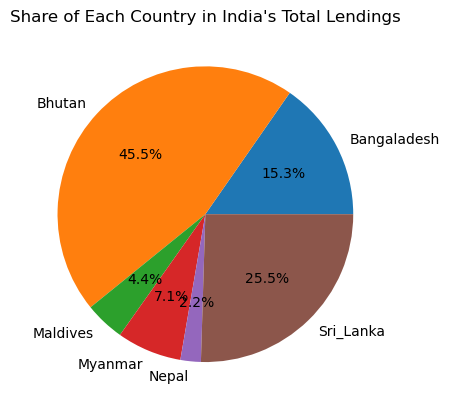

In [65]:
debt_percent = Country_wise_data['Debt_amt_percent']
plt.pie(debt_percent,labels=Country_wise_data['Debtor'],autopct='%1.1f%%')
plt.title("Share of Each Country in India's Total Lendings")
plt.show()